Falta:
- Acabar preproceso de las columnas
- Pasar a franjas la columna a predecir
- Borrar columnas con poca correlacion con la variable a predecir
- Borrar columnas con mucha correlacion entre ellas

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [2]:
train_data = pd.read_csv('../datasets/original/train.csv', sep=',', na_values="NA")
test_data = pd.read_csv('../datasets/original/test.csv', sep=',', na_values="NA")
data = pd.concat([train_data, test_data],sort=False)

In [49]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [50]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 81 entries, Id to SalePrice
dtypes: float64(12), int64(26), object(43)
memory usage: 1.8+ MB


In [51]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Features preprocessing

In [52]:
data[data.columns[data.isna().any()]].isna().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

## MSSubClass

Identifies the type of dwelling involved in the sale.<br>
Type: Categorical

Check nulls

In [44]:
data['MSSubClass'].isna().sum()

0

In [45]:
data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

We change it to categorical

In [46]:
data.loc[data.MSSubClass == 20, 'MSSubClass'] = 'A'
data.loc[data.MSSubClass == 30, 'MSSubClass'] = 'B'
data.loc[data.MSSubClass == 40, 'MSSubClass'] = 'C'
data.loc[data.MSSubClass == 45, 'MSSubClass'] = 'D'
data.loc[data.MSSubClass == 50, 'MSSubClass'] = 'E'
data.loc[data.MSSubClass == 60, 'MSSubClass'] = 'F'
data.loc[data.MSSubClass == 70, 'MSSubClass'] = 'G'
data.loc[data.MSSubClass == 75, 'MSSubClass'] = 'H'
data.loc[data.MSSubClass == 80, 'MSSubClass'] = 'I'
data.loc[data.MSSubClass == 85, 'MSSubClass'] = 'J'
data.loc[data.MSSubClass == 90, 'MSSubClass'] = 'K'
data.loc[data.MSSubClass == 120, 'MSSubClass'] = 'L'
data.loc[data.MSSubClass == 150, 'MSSubClass'] = 'M'
data.loc[data.MSSubClass == 160, 'MSSubClass'] = 'N'
data.loc[data.MSSubClass == 180, 'MSSubClass'] = 'O'
data.loc[data.MSSubClass == 190, 'MSSubClass'] = 'P'

In [11]:
data['MSSubClass'].value_counts()

A    1079
F     575
E     287
L     182
B     139
N     128
G     128
I     118
K     109
P      61
J      48
H      23
D      18
O      17
C       6
M       1
Name: MSSubClass, dtype: int64

## MSZoning

Identifies the general zoning classification of the sale.<br>
Type: Categorical

Check nulls

In [12]:
data['MSZoning'].isna().sum()

4

There is a very low number of nulls so we substitue them by the median.

In [13]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [14]:
median = 'RL'
data.loc[data.MSZoning.isna(), 'MSZoning'] = median
data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

## LotFrontage

Linear feet of street connected to property. <br>
Type: Numeric

Check nulls

In [15]:
data['LotFrontage'].isna().sum()

486

There are too many nulls so we delete the column.

In [16]:
data.drop(columns=['LotFrontage'],inplace=True)

## LotArea

Lot size in square feet. <br>
Type: Numeric

Check nulls

In [17]:
data['LotArea'].isna().sum()

0

Check outliers

In [18]:
outliers = data[data.LotArea>data.LotArea.mean()+2*data.LotArea.std()]
len(outliers)

43

We delete them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3728a201d0>]],
      dtype=object)

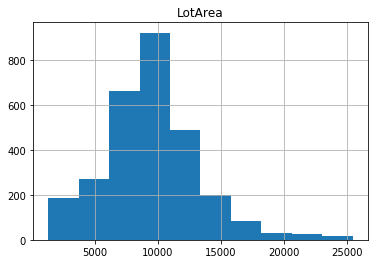

In [19]:
data = data[data['LotArea'] < data.LotArea.mean()+2*data.LotArea.std()]
data.hist(column=['LotArea'])

## Street

Type of road access to property. <br>
Type: Binary

Check nulls

In [20]:
data['Street'].isna().sum()

0

Check distribution

In [21]:
data['Street'].value_counts()

Pave    2866
Grvl      10
Name: Street, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future

## Alley

Type of alley access to property. <br>
Type: Binary

Check nulls

In [22]:
data['Alley'].isna().sum()

2678

There are too many nulls so we delete the column.

In [23]:
data.drop(columns=['Alley'],inplace=True)

## LotShape

General shape of property. <br>
Type: Categorical

Check nulls

In [24]:
data['LotShape'].isna().sum()

0

Check distribution

In [25]:
data['LotShape'].value_counts()

Reg    1852
IR1     944
IR2      67
IR3      13
Name: LotShape, dtype: int64

We merge the three types of irregular

In [26]:
data.loc[data.LotShape == 'IR1', 'LotShape'] = 'IR'
data.loc[data.LotShape == 'IR2', 'LotShape'] = 'IR'
data.loc[data.LotShape == 'IR3', 'LotShape'] = 'IR'
data['LotShape'].value_counts()

Reg    1852
IR     1024
Name: LotShape, dtype: int64

## LandContour

Flatness of the property. <br>
Type: Categorical

Check nulls

In [27]:
data['LandContour'].isna().sum()

0

Check distribution

In [28]:
data['LandContour'].value_counts()

Lvl    2604
HLS     117
Bnk     109
Low      46
Name: LandContour, dtype: int64

## Utilities

Type of utilities available. <br>
Type: Categorical

Check nulls

In [29]:
data['Utilities'].isna().sum()

1

Check distribution

In [30]:
data['Utilities'].value_counts()

AllPub    2874
NoSeWa       1
Name: Utilities, dtype: int64

This column gives not information at all, so we delete it

In [31]:
data.drop(columns=['Utilities'],inplace=True)

## LotConfig

Lot configuration. <br>
Type: Categorical

Check nulls

In [32]:
data['LotConfig'].isna().sum()

0

Check distribution

In [33]:
data['LotConfig'].value_counts()

Inside     2111
Corner      507
CulDSac     163
FR2          81
FR3          14
Name: LotConfig, dtype: int64

We merge the two types of frontage

In [34]:
data.loc[data.LotConfig == 'FR2', 'LotConfig'] = 'FR'
data.loc[data.LotConfig == 'FR3', 'LotConfig'] = 'FR'
data['LotConfig'].value_counts()

Inside     2111
Corner      507
CulDSac     163
FR           95
Name: LotConfig, dtype: int64

## LandSlope

Slope of property. <br>
Type: Categorical

Check nulls

In [35]:
data['LandSlope'].isna().sum()

0

Check distribution

In [36]:
data['LandSlope'].value_counts()

Gtl    2753
Mod     115
Sev       8
Name: LandSlope, dtype: int64

## Neighborhood

Physical locations within Ames city limits. <br>
Type: Categorical

Check nulls

In [37]:
data['Neighborhood'].isna().sum()

0

Check distribution

In [38]:
data['Neighborhood'].value_counts()

NAmes      440
CollgCr    267
OldTown    238
Edwards    190
Somerst    182
NridgHt    166
Gilbert    161
Sawyer     151
NWAmes     131
SawyerW    124
Mitchel    108
BrkSide    108
Crawfor    101
IDOTRR      92
NoRidge     68
Timber      66
StoneBr     49
SWISU       48
MeadowV     37
ClearCr     35
BrDale      30
Blmngtn     28
NPkVill     23
Veenker     23
Blueste     10
Name: Neighborhood, dtype: int64

## Condition1

Proximity to various conditions. <br>
Type: Categorical

Check nulls

In [39]:
data['Condition1'].isna().sum()

0

Check distribution

In [40]:
data['Condition1'].value_counts()

Norm      2478
Feedr      160
Artery      90
RRAn        49
PosN        37
RRAe        28
PosA        19
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

We merge the ones that are related

In [41]:
data.loc[data.Condition1 == 'RRNn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRAn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRNe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'RRAe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'PosN', 'Condition1'] = 'Pos'
data.loc[data.Condition1 == 'PosA', 'Condition1'] = 'Pos'
data['Condition1'].value_counts()

Norm      2478
Feedr      160
Artery      90
RRn         58
Pos         56
RRe         34
Name: Condition1, dtype: int64

## Condition2

Proximity to various conditions (if more than one is present). <br>
Type: Categorical

Check nulls

In [42]:
data['Condition2'].isna().sum()

0

Check distribution

In [43]:
data['Condition2'].value_counts()

Norm      2848
Feedr       12
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

We delete this column because it gives not enought information.

In [44]:
data.drop(columns=['Condition2'],inplace=True)

## BldgType

Type of dwelling. <br>
Type: Categorical

Check nulls

In [45]:
data['BldgType'].isna().sum()

0

Check distribution

In [46]:
data['BldgType'].value_counts()

1Fam      2386
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      58
Name: BldgType, dtype: int64

We merge the ones that are related

In [47]:
data.loc[data.BldgType == 'TwnhsE', 'BldgType'] = 'Twnhs'
data['BldgType'].value_counts()

1Fam      2386
Twnhs      323
Duplex     109
2fmCon      58
Name: BldgType, dtype: int64

## HouseStyle

Style of dwelling. <br>
Type: Categorical

Check nulls

In [48]:
data['HouseStyle'].isna().sum()

0

Check distribution

In [49]:
data['HouseStyle'].value_counts()

1Story    1443
2Story     862
1.5Fin     310
SLvl       128
SFoyer      83
2.5Unf      23
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

## OverallQual

Rates the overall material and finish of the house. <br>
Type: Numeric

Check nulls

In [50]:
data['OverallQual'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3750be0dd0>]],
      dtype=object)

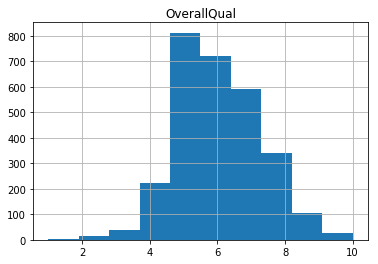

In [51]:
data.hist(column=['OverallQual'])

## OverallCond

Rates the overall condition of the house. <br>
Type: Numeric

Check nulls

In [52]:
data['OverallCond'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3750b1b3d0>]],
      dtype=object)

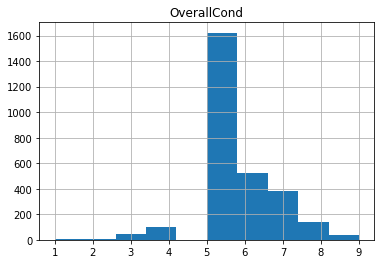

In [53]:
data.hist(column=['OverallCond'])

## YearBuilt

Original construction date. <br>
Type: Date

Check nulls

In [54]:
data['YearBuilt'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3750b1be50>]],
      dtype=object)

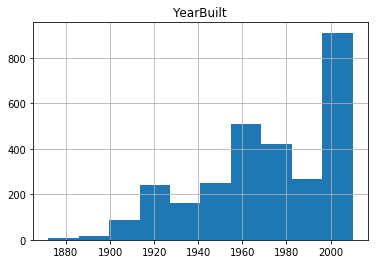

In [55]:
data.hist(column=['YearBuilt'])

## YearRemodAdd

Remodel date (same as construction date if no remodeling or additions). <br>
Type: Date

Check nulls

In [25]:
data['YearRemodAdd'].isna().sum()

0

Check differences with the previous column

In [26]:
len(data[(data['YearBuilt'] == data['YearRemodAdd'])])

1560

We create a new column that tells if the house has been remodeled.

In [27]:
data['Remod'] = data.apply(lambda row: row['YearBuilt'] != row['YearRemodAdd'], axis=1)
data['Remod'].value_counts()

False    1560
True     1359
Name: Remod, dtype: int64

## RoofStyle

Type of roof. <br>
Type: Categorical

Check nulls

In [59]:
data['RoofStyle'].isna().sum()

0

Check distribution

In [60]:
data['RoofStyle'].value_counts()

Gable      2288
Hip         535
Gambrel      22
Flat         16
Mansard      11
Shed          4
Name: RoofStyle, dtype: int64

## Roof material

Roof material. <br>
Type: Categorical

Check nulls

In [61]:
data['RoofMatl'].isna().sum()

0

In [62]:
data['RoofMatl'].value_counts()

CompShg    2841
Tar&Grv      19
WdShake       9
WdShngl       5
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future.

## Exterior1st

Exterior covering on house. <br>
Type: Categorical

In [63]:
data['Exterior1st'].isna().sum()

1

As there is only 1 NA, we will susbtitute this value with the mode.

In [64]:
data['Exterior1st'].value_counts()

VinylSd    1023
MetalSd     446
HdBoard     436
Wd Sdng     402
Plywood     211
CemntBd     123
BrkFace      82
WdShing      55
AsbShng      43
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
ImStucc       1
CBlock        1
Name: Exterior1st, dtype: int64

In [65]:
mode = 'VinylSd'
data.loc[data.Exterior1st.isna(), 'Exterior1st'] = mode
data['Exterior1st'].value_counts()

VinylSd    1024
MetalSd     446
HdBoard     436
Wd Sdng     402
Plywood     211
CemntBd     123
BrkFace      82
WdShing      55
AsbShng      43
Stucco       42
BrkComm       6
AsphShn       2
Stone         2
ImStucc       1
CBlock        1
Name: Exterior1st, dtype: int64

## Exterior2nd

Exterior covering on house (if more than one material). <br>
Type: Categorical

In [66]:
data['Exterior2nd'].isna().sum()

1

As there is only 1 NA, we will susbtitute this value with the mode.

In [67]:
data['Exterior2nd'].value_counts()

VinylSd    1011
MetalSd     442
HdBoard     399
Wd Sdng     383
Plywood     259
CmentBd     124
Wd Shng      79
Stucco       46
BrkFace      45
AsbShng      37
Brk Cmn      22
ImStucc      15
Stone         5
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [68]:
mode = 'VinylSd'
data.loc[data.Exterior2nd.isna(), 'Exterior2nd'] = mode
data['Exterior2nd'].value_counts()

VinylSd    1012
MetalSd     442
HdBoard     399
Wd Sdng     383
Plywood     259
CmentBd     124
Wd Shng      79
Stucco       46
BrkFace      45
AsbShng      37
Brk Cmn      22
ImStucc      15
Stone         5
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

Let's count the differences between this column and Exterior1st

In [69]:
count_differences = data.apply(lambda row: row['Exterior1st'] == row['Exterior2nd'], axis=1)
count_differences.value_counts()

True     2449
False     427
dtype: int64

We delete this column because it gives almost the same information as the previous column.

In [70]:
data.drop(columns=['Exterior2nd'],inplace=True)

## MasVnrType

Masonry veneer type (non-structural external layer of masonry). <br>
Type: Categorical

In [30]:
data['MasVnrType'].isna().sum()

24

In [33]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

Because the majority of values are None we substitue this column for a boolean feature.

In [77]:
data['MasVnr'] = data.apply(lambda row: row['MasVnrType'] != None and row['MasVnrType'] != 'None', axis=1)
data['MasVnr'].value_counts() #check this, the numbers don't make sense
data.drop(columns=['MasVnrType'],inplace=True)

False    1718
True     1158
Name: MasVnr, dtype: int64

## MasVnrArea

Masonry veneer area in square feet. <br>
Type: Numerical

We delete this column because of the same reasons as the previous one.

In [35]:
data.drop(columns=['MasVnrArea'],inplace=True)

23

## ExterQual

Evaluates the quality of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [39]:
data['ExterQual'].isna().sum()

0

In [40]:
data['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

## ExterCond

Evaluates the present condition of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [41]:
data['ExterCond'].isna().sum()

0

In [42]:
data['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [43]:
len(data[(data['ExterCond'] == data['ExterQual'])])

1620

## Foundation

Masonry Masonry veneer area in square feet. <br>
<br>
       BrkTil->Brick & Tile<br>
       CBlock->Cinder Block<br>
       PConc->Poured Contrete	<br>
       Slab->Slab<br>
       Stone->Stone<br>
       Wood->Wood<br>
<br>
Type: Categorical

In [44]:
data['Foundation'].isna().sum()

0

In [45]:
data['Foundation'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

## BsmtQual

Evaluates the height of the basement. <br>
<br>
       Ex->Excellent (100+ inches)<br>
       Gd->Good (90-99 inches)<br>
       TA->Typical (80-89 inches)<br>
       Fa->Fair (70-79 inches)<br>
       Po->Poor (<70 inches)<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [46]:
data['BsmtQual'].isna().sum()

81

In this case NA does not mean the value is missing, it means it makes no sense to evaluate it.

In [47]:
data['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

## BsmtCond

Evaluates the general condition of the basement.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical - slight dampness allowed<br>
       Fa->Fair - dampness or some cracking or settling<br>
       Po->Poor - Severe cracking, settling, or wetness<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [48]:
data['BsmtCond'].isna().sum()

82

In [ ]:
data['BsmtQual'].value_counts()

## BsmtExposure

Refers to walkout or garden level walls.<br>
<br>
       Gd->Good Exposure<br>
       Av->Average Exposure (split levels or foyers typically score average or above)<br>	
       Mn->Mimimum Exposure<br>
       No->No Exposure<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [49]:
data['BsmtExposure'].isna().sum()

82

In [50]:
data['BsmtExposure'].value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

## BsmtFinType1

Rating of basement finished area.<br>
<br>
       GLQ->Good Living Quarters<br>
       ALQ->Average Living Quarters<br>
       BLQ->Below Average Living Quarters<br>	
       Rec->Average Rec Room<br>
       LwQ->Low Quality<br>
       Unf->Unfinshed<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [51]:
data['BsmtFinType1'].isna().sum()

79

In [52]:
data['BsmtFinType1'].value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

## BsmtFinSF1

Type 1 finished square feet.<br>
Type: Categorical

In [53]:
data['BsmtFinSF1'].isna().sum()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57578c4a8>]],
      dtype=object)

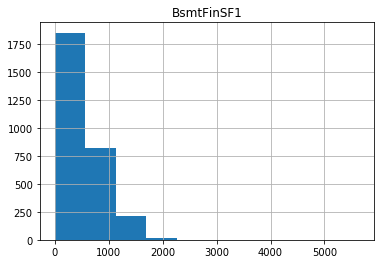

In [55]:
data.hist(column=['BsmtFinSF1'])

## BsmtFinType2

## BsmtFinSF2

## BsmtUnfSF

## TotalBsmtSF

Total square feet of basement area<br>
Type: Numerical

In [56]:
data['TotalBsmtSF'].isna().sum()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5756a1b38>]],
      dtype=object)

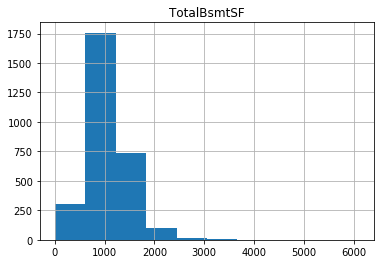

In [57]:
data.hist(column=['TotalBsmtSF'])

## Heating

Type of heating.<br>
<br>
       Floor->Floor Furnace<br>
       GasA->Gas forced warm air furnace<br>
       GasW->Gas hot water or steam heat<br>
       Grav->Gravity furnace<br>	
       OthW->Hot water or steam heat other than gas<br>
       Wall->Wall furnace<br>
<br>       
Type: Categorical

In [58]:
data['Heating'].isna().sum()

0

In [59]:
data['Heating'].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

## HeatingQC

Heating quality and condition.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>       
Type: Categorical

In [62]:
data['HeatingQC'].isna().sum()

0

In [63]:
data['HeatingQC'].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

## CentralAir

Central air conditioning.<br>
<br>
       N->No
       Y->Yes
<br>
Type: Binary		

In [64]:
data['CentralAir'].isna().sum()

0

In [65]:
data['CentralAir'].value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

We change the values to boolean ones.

In [66]:
data.loc[data.CentralAir == 'Y', 'CentralAir'] = True
data.loc[data.CentralAir == 'N', 'CentralAir'] = False

In [67]:
data['CentralAir'].value_counts()

True     2723
False     196
Name: CentralAir, dtype: int64

## Electrical

Electrical system.<br>
<br>
       SBrkr->Standard Circuit Breakers & Romex<br>
       FuseA->Fuse Box over 60 AMP and all Romex wiring (Average)<br>	
       FuseF->60 AMP Fuse Box and mostly Romex wiring (Fair)<br>
       FuseP->60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>
       Mix->Mixed<br>
<br>       
Type: Categorical

In [43]:
data['Electrical'].isna().sum()

1

In [69]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

We fill the NA value with the mode.

In [70]:
mode = 'SBrkr'
data.loc[data.Electrical.isna(), 'Electrical'] = mode
data['Electrical'].value_counts()

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

## 1stFlrSF

First Floor square feet.<br>
Type: Numerical

In [71]:
data['1stFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd575771240>]],
      dtype=object)

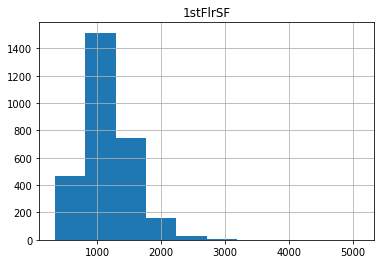

In [72]:
data.hist(column=['1stFlrSF'])

## 2ndFlrSF

Second floor square feet.<br>
Type: Numerical

In [74]:
data['2ndFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd575644160>]],
      dtype=object)

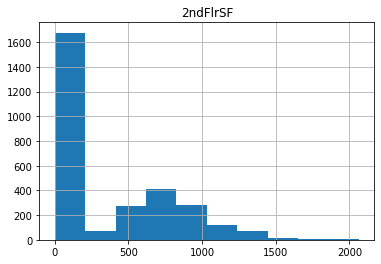

In [73]:
data.hist(column=['2ndFlrSF'])

## LowQualFinSF

Low quality finished square feet (all floors).<br>
Type: Numerical

In [75]:
data['LowQualFinSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57552f0b8>]],
      dtype=object)

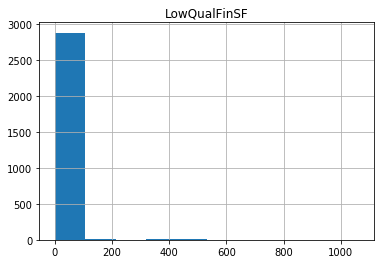

In [78]:
data.hist(column=['LowQualFinSF'])

Nearly all instances have the same value so not many information can be extracted, we will delete this column.

In [79]:
data.drop(columns=['LowQualFinSF'],inplace=True)

## GrLivArea

Above grade (ground) living area square feet.<br>
Type: Numerical

In [4]:
data['GrLivArea'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddcdb8bcf8>]],
      dtype=object)

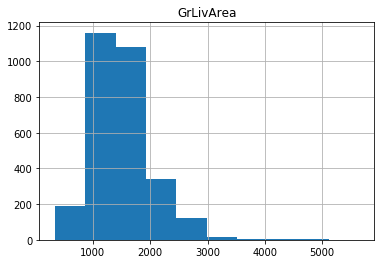

In [5]:
data.hist(column=['GrLivArea'])

## BsmtFullBath

Basement full bathrooms.<br>
Type: Numerical

In [8]:
data['BsmtFullBath'].isna().sum()

2

In [10]:
data['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

We put the 2 NA values with the mode value.

In [11]:
mode = 0
data.loc[data.BsmtFullBath.isna(), 'BsmtFullBath'] = mode
data['BsmtFullBath'].value_counts()

0.0    1707
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

## BsmtHalfBath

Basement half bathrooms.<br>
Type: Numerical

In [12]:
data['BsmtHalfBath'].isna().sum()

2

In [13]:
data['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

This value's distribution is totally one-sided, we will merge it with HalfBath to create a global half bathroom boolean.

## FullBath

Full bathrooms above grade.<br>
Type: Numerical

In [15]:
data['FullBath'].isna().sum()

0

In [16]:
data['FullBath'].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

## HalfBath

Half baths above grade.<br>
Type: Numerical

In [23]:
data['HalfBath'].isna().sum()

0

In [21]:
data['HalfBath'].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

We will change this column to state if the house has a half bathroom with this variable and BsmtHalfBath.

In [40]:
data['HalfBath'] = data.apply(lambda row: row['HalfBath'] != 0 or row['BsmtHalfBath'] != 0.0 , axis=1)
data['HalfBath'].value_counts()

False    1699
True     1220
Name: HalfBath, dtype: int64

## BedroomAbvGr

Bedrooms above grade (does NOT include basement bedrooms).<br>
Type: Numerical

In [63]:
data['BedroomAbvGr'].isna().sum()

0

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

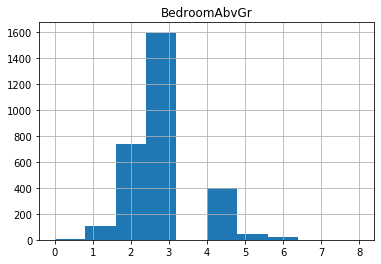

In [66]:
data.hist(column=['BedroomAbvGr'])
data['BedroomAbvGr'].value_counts()

## KitchenAbvGr

Kitchens above grade.<br>
Type: Numerical

In [70]:
data['KitchenAbvGr'].isna().sum()

0

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

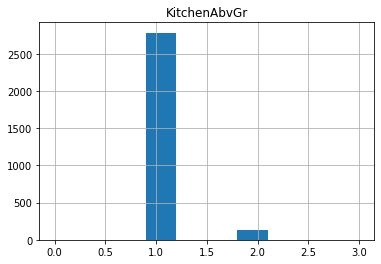

In [71]:
data.hist(column=['KitchenAbvGr'])
data['KitchenAbvGr'].value_counts()

## KitchenQual

Kitchen quality<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [72]:
data['KitchenQual'].isna().sum()

1

In [73]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

We will put the NA as the mode's value.

In [74]:
mode = 'TA'
data.loc[data.KitchenQual.isna(), 'KitchenQual'] = mode
data['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

## TotRmsAbvGrd

Total rooms above grade (does not include bathrooms).<br>
Type: Numerical

In [76]:
data['TotRmsAbvGrd'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddccc51630>]],
      dtype=object)

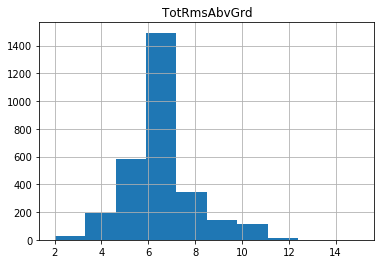

In [78]:
data.hist(column=['TotRmsAbvGrd'])

## Functional

Home functionality (Assume typical unless deductions are warranted).<br>
<br>
       Typ->Typical Functionality<br>
       Min1->Minor Deductions 1<br>
       Min2->Minor Deductions 2<br>
       Mod->Moderate Deductions<br>
       Maj1->Major Deductions 1<br>
       Maj2->Major Deductions 2<br>
       Sev->Severely Damaged<br>
       Sal->Salvage only<br>
<br>		
Type: Categorical

In [79]:
data['Functional'].isna().sum()

2

In [80]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

## Fireplaces

Number of fireplaces.<br>
Type: Numerical

In [81]:
data['Fireplaces'].isna().sum()

0

In [83]:
data['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

## FireplaceQu

Fireplace quality.<br>
<br>
       Ex->Excellent - Exceptional Masonry Fireplace<br>
       Gd->Good - Masonry Fireplace in main level<br>
       TA->Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>
       Fa->Fair - Prefabricated Fireplace in basement<br>
       Po->Poor - Ben Franklin Stove<br>
       NA->No Fireplace<br>
<br>       
Type: Categorical

In [84]:
data['FireplaceQu'].isna().sum()

1420

In [85]:
data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

## GarageType

Garage location.<br>
<br>
       2Types->More than one type of garage<br>
       Attchd->Attached to home<br>
       Basment->Basement Garage<br>
       BuiltIn->Built-In (Garage part of house - typically has room above garage)<br>
       CarPort->Car Port<br>
       Detchd->Detached from home<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [86]:
data['GarageType'].isna().sum()

157

In [87]:
data['GarageType'].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [88]:
rename = 'NoGarage'
data.loc[data.GarageType.isna(), 'GarageType'] = rename
data['GarageType'].value_counts()

Attchd      1723
Detchd       779
BuiltIn      186
NoGarage     157
Basment       36
2Types        23
CarPort       15
Name: GarageType, dtype: int64

## GarageYrBlt

Year garage was built.<br>
Type: Numerical

In [89]:
data['GarageYrBlt'].isna().sum()

159

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddcd016c88>]],
      dtype=object)

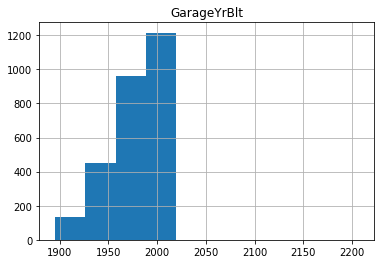

In [90]:
data.hist(column=['GarageYrBlt'])

In [94]:
outlier = data[data.GarageYrBlt>2019]
outlier['GarageYrBlt']

1132    2207.0
Name: GarageYrBlt, dtype: float64

## GarageFinish

 Interior finish of the garage.<br>
<br>
       Fin->Finished<br>
       RFn->Rough Finished<br>	
       Unf->Unfinished<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [4]:
data['GarageFinish'].isna().sum()

159

In [6]:
data['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [7]:
rename = 'NoGarage'
data.loc[data.GarageFinish.isna(), 'GarageFinish'] = rename
data['GarageFinish'].value_counts()

Unf         1230
RFn          811
Fin          719
NoGarage     159
Name: GarageFinish, dtype: int64

## GarageCars

Size of garage in car capacity.<br>
Type: Numerical

In [8]:
data['GarageCars'].isna().sum()

1

In [9]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f3c862588>]],
      dtype=object)

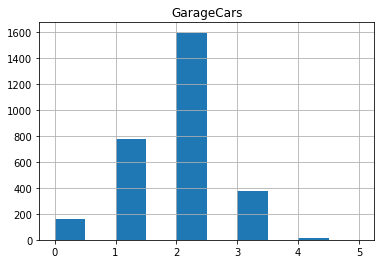

In [10]:
data.hist(column=['GarageCars'])

We will change the NA value to the mode.

In [11]:
mode = 2.0
data.loc[data.GarageCars.isna(), 'GarageCars'] = mode
data['GarageCars'].value_counts()

2.0    1595
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

## GarageArea

Size of garage in square feet.<br>
Type: Numerical

In [12]:
data['GarageArea'].isna().sum()

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f3c76e4a8>]],
      dtype=object)

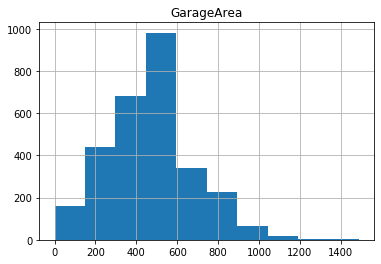

In [14]:
data.hist(column=['GarageArea'])

We will change the NA value to the mean.

In [15]:
mean = data.GarageArea.mean()
data.loc[data.GarageArea.isna(), 'GarageArea'] = mean
data['GarageArea'].isna().sum()

## GarageQual

Garage quality.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [19]:
data['GarageQual'].isna().sum()

159

In [21]:
data['GarageQual'].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [22]:
rename = 'NoGarage'
data.loc[data.GarageQual.isna(), 'GarageQual'] = rename
data['GarageQual'].value_counts()

TA          2604
NoGarage     159
Fa           124
Gd            24
Po             5
Ex             3
Name: GarageQual, dtype: int64

## GarageCond

Garage condition.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [23]:
data['GarageCond'].isna().sum()

159

In [24]:
data['GarageCond'].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [ ]:
rename = 'NoGarage'
data.loc[data.GarageCond.isna(), 'GarageCond'] = rename
data['GarageCond'].value_counts()

## PavedDrive

Paved driveway.<br>
<br>
       Y->Paved<br> 
       P->Partial Pavement<br>
       N->Dirt/Gravel<br>
<br>       
Type: Categorical

In [3]:
data['PavedDrive'].isna().sum()

0

In [4]:
data['PavedDrive'].value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

## WoodDeckSF

Wood deck area in square feet.<br>

Type: Numerical

In [7]:
data['WoodDeckSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C4A23898>]],
      dtype=object)

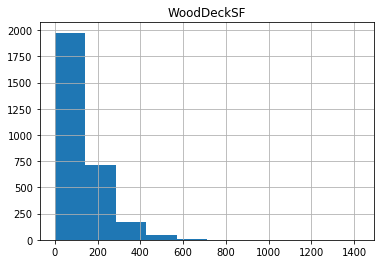

In [8]:
data.hist(column=['WoodDeckSF'])

## OpenPorchSF

Open porch area in square feet.<br>

Type: Numerical

In [10]:
data['OpenPorchSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C1FA8748>]],
      dtype=object)

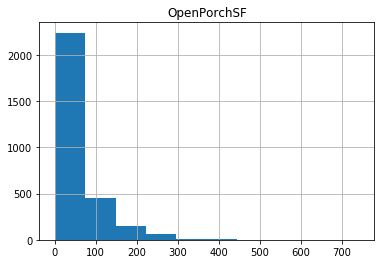

In [11]:
data.hist(column=['OpenPorchSF'])

## EnclosedPorch

Enclosed porch area in square feet.<br>
	
Type: Numerical

In [12]:
data['EnclosedPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C4DC1940>]],
      dtype=object)

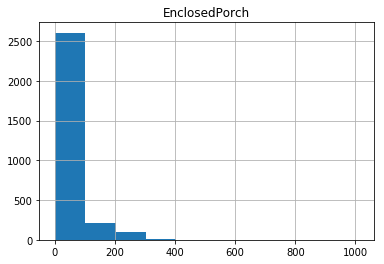

In [13]:
data.hist(column=['EnclosedPorch'])

## 3SsnPorch

Three season porch area in square feet.<br>

Type: Numerical

In [14]:
data['3SsnPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C4ED9AC8>]],
      dtype=object)

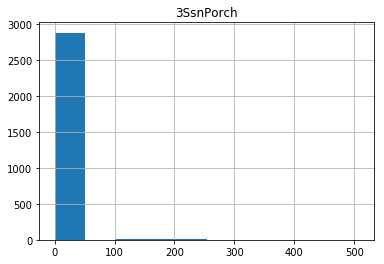

In [15]:
data.hist(column=['3SsnPorch'])

## ScreenPorch

Screen porch area in square feet.<br>

Type: Numerical

In [16]:
data['ScreenPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C4F62710>]],
      dtype=object)

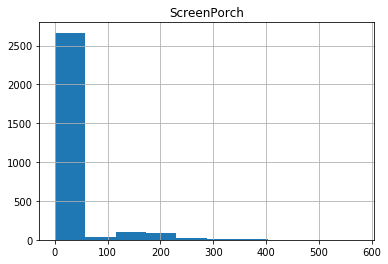

In [17]:
data.hist(column=['ScreenPorch'])

## PoolArea

Pool area in square feet.<br>

Type: Numerical

In [18]:
data['PoolArea'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C5FA37B8>]],
      dtype=object)

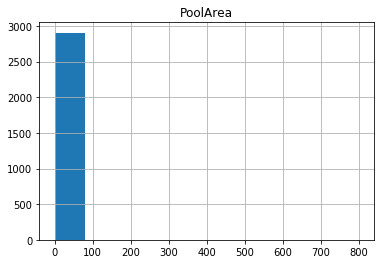

In [19]:
data.hist(column=['PoolArea'])

## PoolQC

Pool quality.<br>
<br>		
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       NA->No Pool<br>
<br>
Type: Categorical

In [20]:
data['PoolQC'].isna().sum()

2909

In [26]:
data['PoolQC'].value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

As we have seen, having a pool is not common enough for it to be a categorical variable. Instead we will make a binary one and drop these columns.

In [31]:
data['Pool'] = data.apply(lambda row: row['PoolArea'] != 0.0 , axis=1)
data['Pool'].value_counts()

False    2906
True       13
Name: Pool, dtype: int64

In [32]:
data.drop(columns=['PoolArea'],inplace=True)
data.drop(columns=['PoolQC'],inplace=True)

## Fence

Fence quality.<br>
<br>		
       GdPrv->Good Privacy<br>
       MnPrv->Minimum Privacy<br>
       GdWo->Good Wood<br>
       MnWw->Minimum Wood/Wire<br>
       NA->No Fence<br>
<br>
Type: Categorical

In [33]:
data['Fence'].isna().sum()

2348

In [34]:
data['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [35]:
rename = 'NoFence'
data.loc[data.Fence.isna(), 'Fence'] = rename
data['Fence'].value_counts()

NoFence    2348
MnPrv       329
GdPrv       118
GdWo        112
MnWw         12
Name: Fence, dtype: int64

## MiscFeature

Miscellaneous feature not covered in other categories.<br>
<br>		
       Elev->Elevator<br>
       Gar2->2nd Garage (if not described in garage section)<br>
       Othr->Other<br>
       Shed->Shed (over 100 SF)<br>
       TenC->Tennis Court<br>
       NA->None<br>
<br>
Type: Categorical

In [36]:
data['MiscFeature'].isna().sum()

2814

In [37]:
data['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

This variable adds very little information because most of the rows have the same value. We will drop it and keep the next one which tells us the moneraty value.

In [55]:
data.drop(columns=['MiscFeature'],inplace=True)

## MiscVal

$Value of miscellaneous feature.<br>

Type: Numerical

In [38]:
data['MiscVal'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C6026400>]],
      dtype=object)

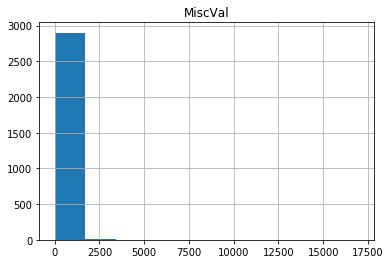

In [42]:
data.hist(column=['MiscVal'])

## MoSold

Month Sold (MM).<br>

Type: Date

In [43]:
data['MoSold'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190C6E6B898>]],
      dtype=object)

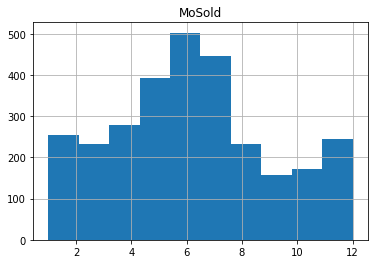

In [46]:
data.hist(column=['MoSold'])

## YrSold

Year Sold (YYYY).<br>

Type: Date

In [47]:
data['YrSold'].isna().sum()

0

In [49]:
data['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

## SaleType

Type of sale.<br>
<br>		
       WD->	Warranty Deed - Conventional<br>
       CWD->Warranty Deed - Cash<br>
       VWD->Warranty Deed - VA Loan<br>
       New->Home just constructed and sold<br>
       COD->Court Officer Deed/Estate<br>
       Con->Contract 15% Down payment regular terms<br>
       ConLw->Contract Low Down payment and low interest<br>
       ConLI->Contract Low Interest<br>
       ConLD->Contract Low Down<br>
       Oth->Other<br>
<br>		
Type: Categorical

In [50]:
data['SaleType'].isna().sum()

1

In [51]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

As there is only 1 missing value we will change it to the mode.

In [52]:
mode = 'WD'
data.loc[data.SaleType.isna(), 'SaleType'] = mode
data['SaleType'].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

## SaleCondition

Condition of sale<br>
<br>
       Normal->Normal Sale<br>
       Abnorml->Abnormal Sale -  trade, foreclosure, short sale<br>
       AdjLand->Adjoining Land Purchase<br>
       Alloca->Allocation - two linked properties with separate deeds, typically condo with a garage unit<br>	
       Family->Sale between family members<br>
       Partial->Home was not completed when last assessed (associated with New Homes)<br>
<br>
Type: Categorical

In [53]:
data['SaleCondition'].isna().sum()

0

In [54]:
data['SaleCondition'].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64